<a href="https://colab.research.google.com/github/Dax1805/YOLOv3-object-detection-tutorial/blob/master/term_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Terms and Documents

This exercise starts off with term statistics computations and graphing. In the final section (for CS6200 students), you collect new documents to experiment with.

Read through this Jupyter notebook and fill in the parts marked with `TODO`.

## Sample Data

Start by looking at some sample data. We donwload the counts of terms in documents for the first one million tokens of a newswire collection.

In [10]:
!wget -O ap201001.json.gz https://github.com/dasmiq/cs6200-documents/blob/main/ap201001.json.gz?raw=true
!gunzip ap201001.json.gz

--2025-01-31 03:39:18--  https://github.com/dasmiq/cs6200-documents/blob/main/ap201001.json.gz?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dasmiq/cs6200-documents/raw/refs/heads/main/ap201001.json.gz [following]
--2025-01-31 03:39:18--  https://github.com/dasmiq/cs6200-documents/raw/refs/heads/main/ap201001.json.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dasmiq/cs6200-documents/refs/heads/main/ap201001.json.gz [following]
--2025-01-31 03:39:18--  https://raw.githubusercontent.com/dasmiq/cs6200-documents/refs/heads/main/ap201001.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185

We convert this file with one JSON record on each line to a list of dictionaries.

In [11]:
import json
rawfile = open('ap201001.json')
terms = [json.loads(line) for line in rawfile]

Here are the first ten records, showing the count of each term for each document and field. In this dataset, field only takes the values `body` or `title`.

In [12]:
terms[1:10]

[{'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'about', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'abuse', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'academy',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'accused',
  'count': 2},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'actress',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'ad', 'count': 1},
 {'id': 'APW_ENG_20100101.0001', 'field': 'body', 'term': 'after', 'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agenda',
  'count': 1},
 {'id': 'APW_ENG_20100101.0001',
  'field': 'body',
  'term': 'agreed',
  'count': 1}]

Each record has four fields:
* `id`, with the identifier for the document;
* `field`, with the region of the document containing a given term;
* `term`, with the lower-cased term; and
* `count`, with the number of times each term occurred in that field and document.

## Computing Term Statistics


In [27]:
## Build the documents dictionary(Helper fn)
from collections import defaultdict

documents = defaultdict(lambda: defaultdict(int))

for entry in terms:
    documents[entry["id"]][entry["term"]] += entry["count"]

documents = dict(documents)

If we look at the most frequent terms for a given document, we mostly see common function words, such as `the`, `and`, and `of`. Start exploring the dataset by computing some of these basic term statistics. You can make your life easier using data frame libraries such as `pandas`, core python libraries such as `collections`, or just simple list comprehensions.

Feel free to define helper functions in your code before computing the statistics we're looking for.

In [28]:
# TODO: Print the 10 terms from document APW_ENG_20100101.0001 with the highest count.
from collections import Counter

doc_id = "APW_ENG_20100101.0001"

if doc_id in documents:
    top_terms = Counter(documents[doc_id]).most_common(10)

    print(f"Top 10 terms of {doc_id}:")
    for term, count in top_terms:
        print(f"{term}: {count}")
else:
    print(f"Document {doc_id} not found!")

Top 10 terms in document APW_ENG_20100101.0001:
a: 16
the: 11
and: 10
brooks: 10
of: 10
to: 10
he: 9
in: 9
gomez: 8
for: 6


In [29]:
# TODO: Print the 10 terms with the highest total count in the corpus.

corpus_term_counts = Counter()

for doc_id, term_counts in documents.items():
    corpus_term_counts.update(term_counts)

top_corpus_terms = corpus_term_counts.most_common(10)

print("Top 10 terms in the corpus:")
for term, count in top_corpus_terms:
    print(f"{term}: {count}")

Top 10 terms in the corpus:
the: 62216
to: 26931
in: 25659
a: 23383
of: 22326
and: 22125
said: 10888
for: 9716
on: 9382
that: 8942


Raw counts may not be the most informative statistic. One common improvement is to use *inverse document frequency*, the inverse of the proportion of documents that contain a given term.

In [44]:
# TODO: Compute the number of distinct documents in the collection.
N = len(documents)
print(f"Total number of distinct documents: {N}")

# TODO: Compute the number of distinct documents each term appears in
# and store in a dictionary.
df = defaultdict(int)

for doc_id, term_counts in documents.items():
    for term in term_counts.keys():
        df[term] += 1
df = dict(df)

print("Sample document frequencies for some terms:")
for term, count in list(df.items())[:10]:
    print(f"{term}: {count}")

Total number of distinct documents: 2778
Sample document frequencies for some terms:
a: 2571
about: 1077
abuse: 26
academy: 20
accused: 201
actress: 23
ad: 16
after: 1484
agenda: 16
agreed: 163


In [31]:
# TODO: Print the relative document frequency of 'the',
# i.e., the number of documents that contain 'the' divided by N.
term = "the"

if term in df:
    relative_df = df[term] / N  # Compute relative document frequency
    print(f"Relative document frequency of '{term}': {relative_df:.4f}")
else:
    print(f"Term '{term}' not found in the corpus.")

Relative document frequency of 'the': 0.9705


Empricially, we usually see better retrieval results if we rescale term frequency (within documents) and inverse document frequency (across documents) with the log function. Let the `tfidf` of term _t_ in document _d_ be:
```
tfidf(t, d) = log(count(t, d) + 1) * log(N / df(t))
```

Later in the course, we will show a probabilistic derivation of this quantity based on smoothing language models.

In [32]:
# TODO: Compute the tf-idf value for each term in each document.
# Take the raw term data and add a tfidf field to each record.
import math

tfidf_terms = []

for entry in terms:
    doc_id = entry["id"]
    term = entry["term"]
    count = entry["count"]

    if term in df:
        tf = math.log(count + 1)
        idf = math.log(N / df[term])

        tfidf_value = tf * idf

        tfidf_terms.append({
            "id": doc_id,
            "term": term,
            "count": count,
            "tfidf": tfidf_value
        })

print("Sample TF-IDF values:")
for record in tfidf_terms[:10]:
    print(record)

Sample TF-IDF values:
{'id': 'APW_ENG_20100101.0001', 'term': 'a', 'count': 16, 'tfidf': 0.21939360394288007}
{'id': 'APW_ENG_20100101.0001', 'term': 'about', 'count': 1, 'tfidf': 0.6567928905987198}
{'id': 'APW_ENG_20100101.0001', 'term': 'abuse', 'count': 1, 'tfidf': 3.2379607976016733}
{'id': 'APW_ENG_20100101.0001', 'term': 'academy', 'count': 1, 'tfidf': 3.419817847796999}
{'id': 'APW_ENG_20100101.0001', 'term': 'accused', 'count': 2, 'tfidf': 2.8851553947936432}
{'id': 'APW_ENG_20100101.0001', 'term': 'actress', 'count': 1, 'tfidf': 3.3229422514900757}
{'id': 'APW_ENG_20100101.0001', 'term': 'ad', 'count': 1, 'tfidf': 3.5744891712505766}
{'id': 'APW_ENG_20100101.0001', 'term': 'after', 'count': 1, 'tfidf': 0.43459641976770297}
{'id': 'APW_ENG_20100101.0001', 'term': 'agenda', 'count': 1, 'tfidf': 3.5744891712505766}
{'id': 'APW_ENG_20100101.0001', 'term': 'agreed', 'count': 1, 'tfidf': 1.9655826367575198}


In [33]:
# TODO: Print the 20 term-document pairs with the highest tf-idf values.
top_tfidf_terms = sorted(tfidf_terms, key=lambda x: x["tfidf"], reverse=True)[:20]

print("Top 20 term-document pairs with the highest TF-IDF values:")
for record in top_tfidf_terms:
    print(f"Document: {record['id']}, Term: {record['term']}, TF-IDF: {record['tfidf']:.4f}")

Top 20 term-document pairs with the highest TF-IDF values:
Document: APW_ENG_20100103.0028, Term: guarani, TF-IDF: 23.2929
Document: APW_ENG_20100105.0061, Term: nomination, TF-IDF: 22.5194
Document: APW_ENG_20100105.0446, Term: methane, TF-IDF: 21.9852
Document: APW_ENG_20100103.0015, Term: kheire, TF-IDF: 21.4734
Document: APW_ENG_20100105.0014, Term: greyhound, TF-IDF: 21.4734
Document: APW_ENG_20100107.0036, Term: shakespeare, TF-IDF: 21.3070
Document: APW_ENG_20100105.0061, Term: guild, TF-IDF: 20.6675
Document: APW_ENG_20100106.0428, Term: shakespeare, TF-IDF: 20.5021
Document: APW_ENG_20100102.0197, Term: elkhart, TF-IDF: 20.3387
Document: APW_ENG_20100106.0075, Term: magna, TF-IDF: 20.3387
Document: APW_ENG_20100106.1325, Term: sutton, TF-IDF: 19.9209
Document: APW_ENG_20100104.0043, Term: tohti, TF-IDF: 19.7040
Document: APW_ENG_20100105.0014, Term: greyhounds, TF-IDF: 19.7040
Document: APW_ENG_20100107.0018, Term: krewe, TF-IDF: 19.7040
Document: APW_ENG_20100107.0928, Term: 

## Plotting Term Distributions

Besides frequencies and tf-idf values within documents, it is often helpful to look at the distrubitions of word frequencies in the whole collection. In class, we talk about the Zipf distribution of word rank versus frequency and Heaps' Law relating the number of distinct words to the number of tokens.

We might examine these distributions to see, for instance, if an unexpectedly large number of very rare terms occurs, which might indicate noise added to our data.

In [34]:
# TODO: Compute a list of the distinct words in this collection and sort it in descending order of frequency.
# Thus frequency[0] should contain the word "the" and the count 62216.

corpus_term_counts = Counter()

for term_counts in documents.values():
    corpus_term_counts.update(term_counts)

frequency = sorted(corpus_term_counts.items(), key=lambda x: x[1], reverse=True)

print("Top 10 most frequent words in the corpus:")
for term, count in frequency[:10]:
    print(f"{term}: {count}")

Top 10 most frequent words in the corpus:
the: 62216
to: 26931
in: 25659
a: 23383
of: 22326
and: 22125
said: 10888
for: 9716
on: 9382
that: 8942


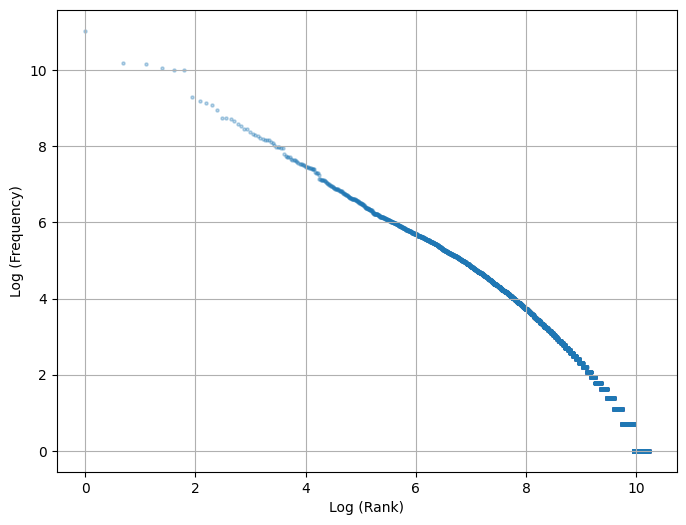

In [36]:
# TODO: Plot a graph of the log of the rank (starting at 1) on the x-axis,
# against the log of the frequency on the y-axis. You may use the matplotlib
# or other library.

import matplotlib.pyplot as plt
import numpy as np

ranks = np.log(np.arange(1, len(frequency) + 1))
frequencies = np.log([count for _, count in frequency])

plt.figure(figsize=(8, 6))
plt.scatter(ranks, frequencies, alpha=0.3, s=5)
plt.xlabel("Log (Rank)")
plt.ylabel("Log (Frequency)")
plt.grid(True)

plt.show()

In [38]:
# TODO: Compute the number of tokens in the corpus.
# Remember to count each occurrence of each word. For instance, the 62,216
# instances of "the" will all count here.
ntokens = sum(count for _, count in frequency)
print(f"Total number of tokens: {ntokens}")

Total number of tokens in the corpus: 1000000


In [41]:
# TODO: Compute the proportion of tokens made up by the top 10 most
# frequent words.
top_10_count = sum(count for _, count in frequency[:10])
proportion_top_10 = top_10_count / ntokens

print(f"Proportion of tokens made up by the top 10 most frequent words: {proportion_top_10:.4f}")

Proportion of tokens made up by the top 10 most frequent words: 0.2216


In [43]:
# TODO: Compute the proportion of tokens made up by the words that occur
# exactly once in this collection.
One = [count for _, count in frequency if count == 1]
One_token_count = sum(One)
proportion_One = One_token_count / ntokens
print(f"Proportion of tokens made up by words that occur exactly once: {proportion_One:.4f}")

Proportion of tokens made up by words that occur exactly once: 0.0066


## Acquiring New Documents (for CS6200)

For this assignment so far, you've worked with data that's already been extracted, tokenized, and counted. In this final section, you'll explore acquiring new data.

One common way of acquiring data is through application programming interfaces (APIs) to various databases. The Library of Congress's [_Chronicling America_](https://chroniclingamerica.loc.gov/) site aggregates digitized US newspapers from the past two hundred years, such as the [_Seattle Star_](https://chroniclingamerica.loc.gov/lccn/sn87093407/1925-01-17/ed-1/seq-1/) from 100 years ago.

You can use [the API](https://chroniclingamerica.loc.gov/about/api/) to retrieve JSON data listing all issues of the _Seattle Star_: https://chroniclingamerica.loc.gov/lccn/sn87093407.json

Note the list in the `issues` field. For example, here is the record for the January 17, 1925, issue: https://chroniclingamerica.loc.gov/lccn/sn87093407/1925-01-17/ed-1.json

In that issue record, you'll see records for each page, e.g.: https://chroniclingamerica.loc.gov/lccn/sn87093407/1925-01-17/ed-1/seq-1.json

And inside that page record, you'll see links to data about that page in various data formats, such as JPEG, PDF, and plain text, which is what we want here: https://chroniclingamerica.loc.gov/lccn/sn87093407/1925-01-17/ed-1/seq-1/ocr.txt

This plain text was transcribed from the old page images using optical character recognition (OCR) models, and so contains errors.

Your task is to acquire and analyze the issues of the _Seattle Star_ from the month of January, 1925, i.e., the issues with a date field that starts with `1925-01`. This should be about the same amount of data as the million words from the Associated Press you analyzed in the last section.

**TODO**: Write code that calls the _Chronicling America_ API to download and extract the text from the _Seattle Star_ from January 1925. You can use the `json` library from above and any other libraries you wish to fetch data from URLs. As you would when working with any production API, you may need to limit your rate of requests.

In [28]:
import os
import json
import time
import requests
from concurrent.futures import ThreadPoolExecutor

# Base directories for caching
CACHE_DIR = "cache"
ISSUE_CACHE_DIR = os.path.join(CACHE_DIR, "issues")
PAGE_CACHE_DIR = os.path.join(CACHE_DIR, "pages")
OCR_OUTPUT_DIR = os.path.join(CACHE_DIR, "ocr")

os.makedirs(ISSUE_CACHE_DIR, exist_ok=True)
os.makedirs(PAGE_CACHE_DIR, exist_ok=True)
os.makedirs(OCR_OUTPUT_DIR, exist_ok=True)

# Base URL for newspaper metadata
BASE_URL = "https://chroniclingamerica.loc.gov/lccn/sn87093407.json"

# Use a session for better performance
session = requests.Session()


def fetch_json(url, cache_path, max_retries=5):
    if os.path.exists(cache_path):
        with open(cache_path, "r", encoding="utf-8") as file:
            return json.load(file)

    wait_time = 2  # Initial wait time
    for attempt in range(max_retries):
        try:
            response = session.get(url, timeout=10)
            if response.status_code == 200:
                data = response.json()
                with open(cache_path, "w", encoding="utf-8") as file:
                    json.dump(data, file, indent=2)
                return data
            elif response.status_code == 429:
                print(f" Rate limited (429). Waiting {wait_time} sec...")
                time.sleep(wait_time)
                wait_time *= 2
            else:
                print(f" Failed to fetch {url} (Status {response.status_code})")
                return None
        except requests.RequestException as e:
            print(f" Error fetching {url}: {e}")

    return None


def fetch_ocr_text(page_json_url):
    page_cache_file = os.path.join(PAGE_CACHE_DIR, os.path.basename(page_json_url))

    page_data = fetch_json(page_json_url, page_cache_file)
    if not page_data:
        return ""

    ocr_text_url = page_json_url.replace(".json", "/ocr.txt")
    try:
        response = session.get(ocr_text_url, timeout=10)
        if response.status_code == 200:
            return response.text.strip()
        else:
            print(f" No OCR text found at {ocr_text_url} (Status {response.status_code})")
    except requests.RequestException as e:
        print(f" Error fetching OCR text: {e}")

    return ""


def process_issue(issue_url):
    issue_cache_file = os.path.join(ISSUE_CACHE_DIR, os.path.basename(issue_url))
    issue_data = fetch_json(issue_url, issue_cache_file)

    if not issue_data:
        return

    issue_date = issue_data.get("date_issued", "unknown")
    ocr_output_file = os.path.join(OCR_OUTPUT_DIR, f"{issue_date}.txt")

    if os.path.exists(ocr_output_file):
        print(f" OCR text for {issue_date} already saved. Skipping...")
        return

    print(f" Processing issue: {issue_date}")

    page_urls = [page["url"] + ".json" if not page["url"].endswith(".json") else page["url"] for page in issue_data.get("pages", [])]

    # Fetch pages in parallel
    with ThreadPoolExecutor(max_workers=5) as executor:
        texts = list(executor.map(fetch_ocr_text, page_urls))

    # Save extracted OCR text
    extracted_texts = [text for text in texts if text.strip()]
    if extracted_texts:
        with open(ocr_output_file, "w", encoding="utf-8") as f:
            f.write("\n\n".join(extracted_texts))
        print(f" Saved OCR text for {issue_date}")
    else:
        print(f" No OCR text extracted for {issue_date}")


# Fetch newspaper metadata
metadata_cache_path = os.path.join(CACHE_DIR, "seattle_star_metadata.json")
newspaper_data = fetch_json(BASE_URL, metadata_cache_path)

if not newspaper_data:
    print(" Failed to fetch newspaper metadata. Exiting.")
    exit()

# Extract issues for January 1925
issues = newspaper_data.get("issues", [])
january_1925_issues = sorted(set(
    issue["url"] + ".json" if not issue["url"].endswith(".json") else issue["url"]
    for issue in issues if issue["date_issued"].startswith("1925-01")
))

print(f" Found {len(january_1925_issues)} issues from January 1925.")

# Process all issues sequentially
for issue_url in january_1925_issues:
    process_issue(issue_url)

print(" Data extraction complete!")


 Found 27 issues from January 1925.
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 already saved. Skipping...
 OCR text for 1925-01-01 alr

**TODO**: Write code to tokenize the text and count the resulting terms in each document. Since this data comes from automatically transcribing printed pages, some words may be hyphenated across line breaks. There is more than one right way to tokenize this data, so add comments to your code documenting your choices.

In [29]:
# TODO: Tokenization code here.

import re
from collections import Counter

# Load OCR text from the saved file
ocr_file = "cache/ocr/1925-01-01.txt"

if not os.path.exists(ocr_file):
    print(f" OCR file not found: {ocr_file}")
    exit()

print(f" Loading OCR text from: {ocr_file}")

with open(ocr_file, "r", encoding="utf-8") as f:
    ocr_text = f.read()

# Function to clean and tokenize text
def tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    tokens = text.split()
    return tokens

# Apply tokenization
tokens = tokenize(ocr_text)

# Count word frequencies
word_counts = Counter(tokens)

# Display sample results
print(f" Total Tokens: {len(tokens)}")
print(f" Unique Words: {len(word_counts)}")

print("\n Top 10 Most Frequent Words:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

 Loading OCR text from: cache/ocr/1925-01-01.txt
 Total Tokens: 48703
 Unique Words: 13483

 Top 10 Most Frequent Words:
the: 2023
and: 1178
of: 1133
a: 839
to: 797
in: 759
i: 525
for: 419
e: 349
at: 322


**TODO**: Plot a graph of the log rank against log frequency for your collection, as you did for the sample collection above.

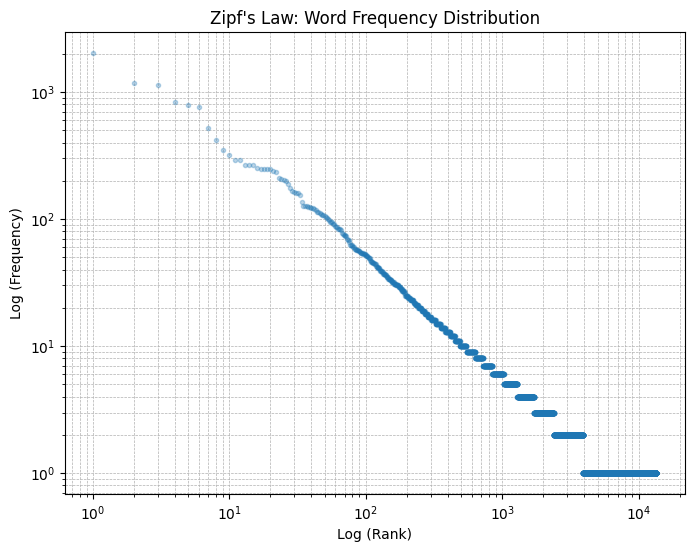

In [30]:
sorted_terms = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)


ranks = np.arange(1, len(sorted_terms) + 1)
frequencies = np.array([count for _, count in sorted_terms])


plt.figure(figsize=(8, 6))
plt.loglog(ranks, frequencies, marker="o", linestyle="None", markersize=3, alpha=0.3)

plt.xlabel("Log (Rank)")
plt.ylabel("Log (Frequency)")
plt.title("Zipf's Law: Word Frequency Distribution")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

**TODO**: What do you observe about the differences between the distributions of the Associated Press and Seattle Star collections? In this text box, give some possible reasons for these differences.